# Image Classification – Deep Learning Project in Python with Keras

Image classification is a fascinating deep learning project. Specifically, image classification comes under the computer vision project category.

In this project, we will build a convolution neural network in Keras with python on a CIFAR-10 dataset. First, we will explore our dataset, and then we will train our neural network using python and Keras.

# What is Image Classification?

The classification problem is to categorize all the pixels of a digital image into one of the defined classes.
Image classification is the most critical use case in digital image analysis.
Image classification is an application of both supervised classification and unsupervised classification.
In supervised classification, we select samples for each target class. We train our neural network on these target class samples and then classify new samples.
In unsupervised classification, we group the sample images into clusters of images having similar properties. Then, we classify each cluster into our intended classes.

# About Image Classification Dataset

CIFAR-10 is a very popular computer vision dataset. This dataset is well studied in many types of deep learning research for object recognition.

This dataset consists of 60,000 images divided into 10 target classes, with each category containing 6000 images of shape 32*32. This dataset contains images of low resolution (32*32), which allows researchers to try new algorithms. The 10 different classes of this dataset are:

Airplane
Car
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck
CIFAR-10 dataset is already available in the datasets module of Keras. We do not need to download it; we can directly import it from keras.datasets.

# Project Prerequisites:

The prerequisite to develop and execute image classification project is Keras and Tensorflow installation.

# Steps for image classification on CIFAR-10:

1. Load the dataset from keras datasets module

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 92s 1us/step


2. Plot some images from the dataset to visualize the dataset

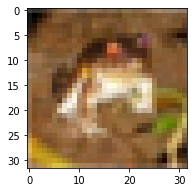

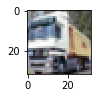

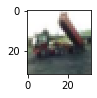

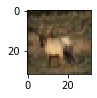

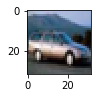

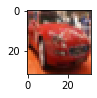

In [3]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

3. Import the required layers and modules to create our convolution neural net architecture

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

4. Convert the pixel values of the dataset to float type and then normalize the dataset

In [5]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

5. Now perform the one-hot encoding for target classes

In [6]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

6. Create the sequential model and add the layers

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

7. Configure the optimizer and compile the model

In [9]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

8. View the model summary for better understanding of model architecture

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

9. Train the model

In [11]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 117s 2ms/step - loss: 1.6929 - accuracy: 0.3859 - val_loss: 1.3960 - val_accuracy: 0.4955
Epoch 2/10
50000/50000 [==============================] - 108s 2ms/step - loss: 1.3754 - accuracy: 0.5051 - val_loss: 1.2469 - val_accuracy: 0.5579
Epoch 3/10
50000/50000 [==============================] - 110s 2ms/step - loss: 1.2103 - accuracy: 0.5683 - val_loss: 1.1232 - val_accuracy: 0.5941
Epoch 4/10
50000/50000 [==============================] - 111s 2ms/step - loss: 1.0960 - accuracy: 0.6092 - val_loss: 1.0913 - val_accuracy: 0.6135
Epoch 5/10
50000/50000 [==============================] - 107s 2ms/step - loss: 0.9993 - accuracy: 0.6452 - val_loss: 1.0336 - val_accuracy: 0.6342
Epoch 6/10
50000/50000 [==============================] - 112s 2ms/step - loss: 0.9275 - accuracy: 0.6709 - val_loss: 1.0083 - val_accuracy: 0.6521
Epoch 7/10
50000/50000 [==============================] - 104s

10. Calculate its accuracy on testing data

In [12]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

10000/10000 [==============================] - 3s 307us/step
68.01999807357788


11. Save the model

In [13]:
model.save("model1_cifar_10epoch.h5")

12. Make a dictionary to map to the output classes and make predictions from the model

In [17]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("horse.jpeg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

7 horse
